In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("fight-songs.csv")
df.columns

Index(['school', 'conference', 'song_name', 'writers', 'year',
       'student_writer', 'official_song', 'contest', 'bpm', 'sec_duration',
       'fight', 'number_fights', 'victory', 'win_won', 'victory_win_won',
       'rah', 'nonsense', 'colors', 'men', 'opponents', 'spelling',
       'trope_count', 'spotify_id'],
      dtype='object')

In [7]:
box_plot_data = df.drop(0) # Drop Notre Dame because it's the only independent

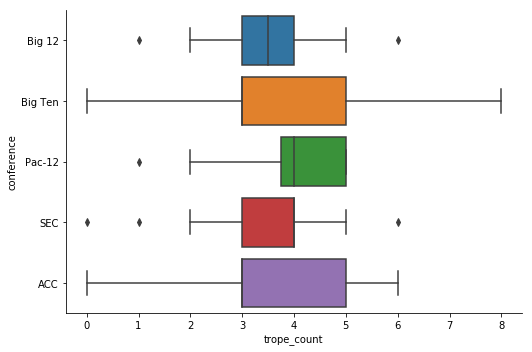

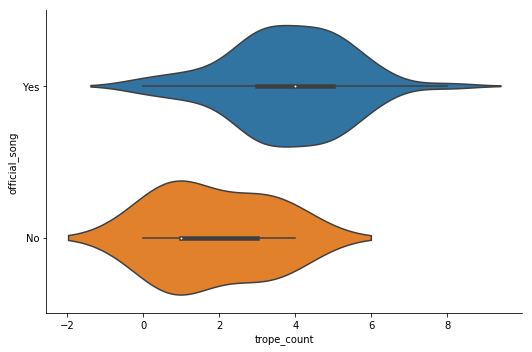

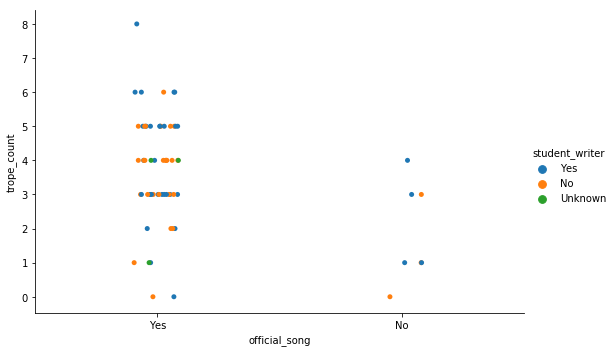

In [29]:
sns.catplot(x="trope_count", y="conference", kind="box", data = box_plot_data, height = 5, aspect = 1.5)
sns.catplot(x="trope_count", y="official_song", kind="violin", data = box_plot_data, height = 5, aspect = 1.5)
sns.catplot(x="official_song", y="trope_count", hue="student_writer", data = box_plot_data, height = 5, aspect = 1.5)

Fight songs that are their school's official song tend to have more tropes written into them. Big 10 has the largest range of tropes in their fight songs and the Pac-12 is the tightest.

In [12]:
medians = box_plot_data.groupby(['conference'])['trope_count'].median()
print(medians) # medians because not completely shown in plot

conference
ACC        3.0
Big 12     3.5
Big Ten    3.0
Pac-12     4.0
SEC        4.0
Name: trope_count, dtype: float64


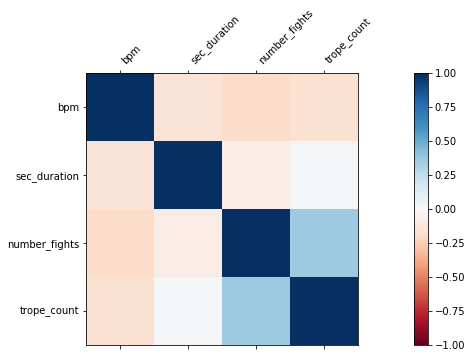

In [17]:
correlations = df.corr()
labels = ["bpm","sec_duration", "number_fights", "trope_count"]

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111) # series of 3D subplots
cax = ax.matshow(correlations, vmin = -1, vmax = 1, cmap = 'RdBu')
fig.colorbar(cax)
ticks = np.arange(0,4,1) # series of tick marks corresponding to 8 independent variables 0-7
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(labels, rotation=45, ha="left") # making it look pretty because long label names
ax.set_yticklabels(labels)

plt.show()

Heat map reveals a correlation between number of fights the song has and trope_count

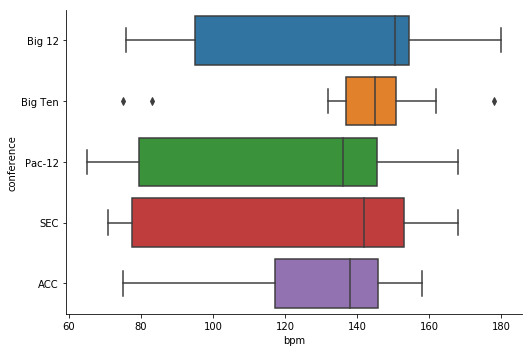

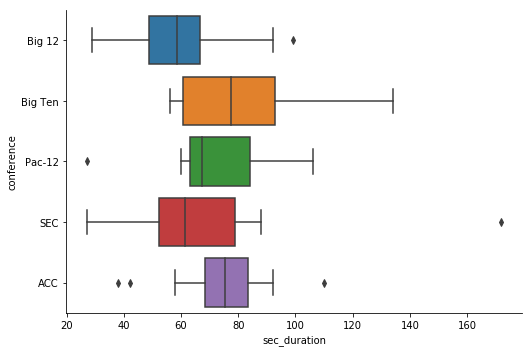

In [19]:
sns.catplot(x="bpm", y="conference", kind="box", data = box_plot_data, height = 5, aspect = 1.5)
sns.catplot(x="sec_duration", y="conference", kind="box", data = box_plot_data, height = 5, aspect = 1.5)

Aspects like bpm and duration are seemingly random and have no relationship

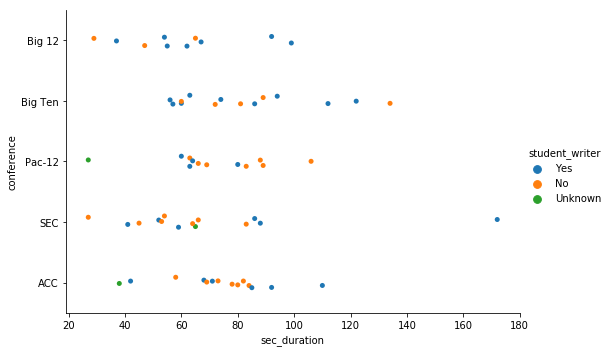

In [31]:
sns.catplot(x="sec_duration", y="conference", hue="student_writer", data = box_plot_data, height = 5, aspect = 1.5)

There also does not seem to be a relationship between how long a song is and if a student wrote it or not

In [9]:
df = df.replace("Unknown", np.nan)
counts = df["year"].value_counts(dropna = True)
print(counts)

1915    4
1912    4
1909    3
1919    3
1950    3
1914    2
1908    2
1947    2
1936    2
1923    2
1937    1
1930    1
1911    1
1933    1
1962    1
1907    1
1922    1
1939    1
1959    1
1955    1
1928    1
1918    1
1946    1
1934    1
1924    1
1910    1
1926    1
1913    1
1898    1
1904    1
1961    1
1948    1
1925    1
1917    1
1893    1
1916    1
1968    1
1905    1
1941    1
1931    1
1967    1
1927    1
1952    1
Name: year, dtype: int64


[Text(0, 0.5, 'Songs Published'), Text(0.5, 0, 'Year')]

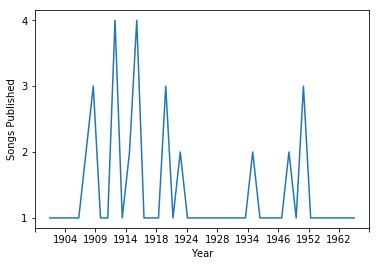

In [33]:
ax = sns.lineplot(data=counts, )
ax.xaxis.set_major_locator(plt.LinearLocator(12))
ax.yaxis.set_major_locator(plt.FixedLocator([-1,1,2,3,4]))
ax.set(xlabel='Year', ylabel='Songs Published')